In [1]:
import sys
if '../' not in sys.path:
    sys.path.append('../')
if '../task01' not in sys.path:
    sys.path.append('../task01')

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from data import data_problems_examples
import RBM as rbm
import neural_network as nn

%matplotlib inline

In [3]:
def indicator_estimator(predicted, observed):
    return 100.0 * np.sum(predicted == observed) / observed.shape[0]

In [4]:
type_chosen = 'xor'

X_train, Y_train = data_problems_examples.generate_problem(n_size=50, type=type_chosen)
X_test, Y_test = data_problems_examples.generate_problem(n_size=50, type=type_chosen)

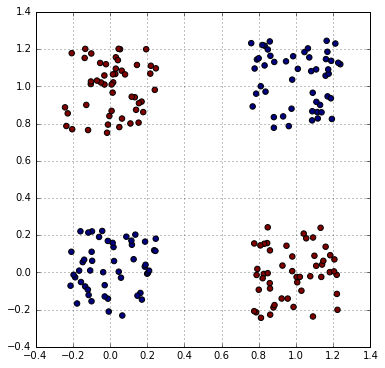

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=30)
plt.grid()

In [6]:
nn_rbm = rbm.RBM(layers=[
        rbm.BernoulliLayer(X_train.shape[1]),
        rbm.BernoulliLayer(2 * X_train.shape[1])
    ], loss_function='NLL')

nn_rbm.fit(np.round(X_train), n_epochs=100, learning_rate=.05, n_gibbs_steps=1, batch_size=10)

epoch = 99; criteria = 1.3677998588; learning_rate = 0.05 


In [7]:
print 'weights:\n', nn_rbm.weights
print 'bias (visible):\n', nn_rbm.layers[0].bias
print 'bias (hidden):\n',  nn_rbm.layers[1].bias

weights:
[[ 0.32291736  0.0500266  -0.3552537   0.04940282]
 [ 0.07173695  0.12553225 -0.11915258 -0.08378907]]
bias (visible):
[[-0.105  0.07 ]]
bias (hidden):
[[ 0.04878023  0.01468805  0.43399758  0.10628112]]


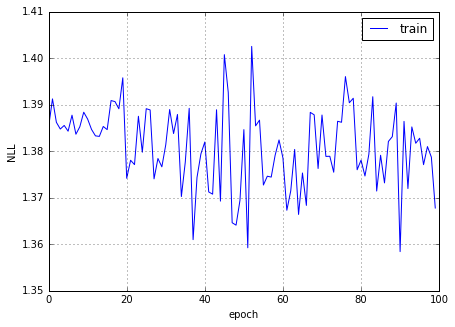

In [8]:
plt.figure(figsize=(7, 5))
plt.plot(nn_rbm.error_train, label='train')
if nn_rbm.error_test:
    plt.plot(nn_rbm.error_test, label='CV')
plt.xlabel('epoch')
plt.ylabel(nn_rbm.loss_function)
plt.legend()
plt.grid()

In [9]:
Y_train = np.asarray([y == np.arange(2) for y in Y_train]).astype(int)

In [10]:
nn_bp = nn.NeuralNetwork(layers=[
        nn.SigmoidLayer(2 * X_train.shape[1], bias=True),
        nn.SoftmaxLayer(2)
    ], input_bias=True, loss_function='NLL', regular_type=None)

In [11]:
nn_bp.set_random_weights(X_train)

print 'Number of weight matrixes:', len(nn_bp.weights)
for w in nn_bp.weights:
    print w.shape

Number of weight matrixes: 2
(3L, 4L)
(5L, 2L)


In [12]:
nn_bp.weights[0] = np.r_[nn_rbm.weights, nn_rbm.layers[1].bias]

print 'Number of weight matrixes:', len(nn_bp.weights)
for w in nn_bp.weights:
    print w.shape

Number of weight matrixes: 2
(3L, 4L)
(5L, 2L)


In [13]:
nn_bp.fit(X_train, Y_train, n_epoch=200, batch_size=30, learning_params=(1.5, 0.75, 20))

../task01\neural_network.py:222: UserWarning: You mast have forgotten to prepare weights!
 See the function: set_random_weights(X)

  warnings.warn("You mast have forgotten to prepare weights!\n See the function: set_random_weights(X)\n")


epoch = 199 error = 0.0365513183683 learning_rate = 0.0844702720642 


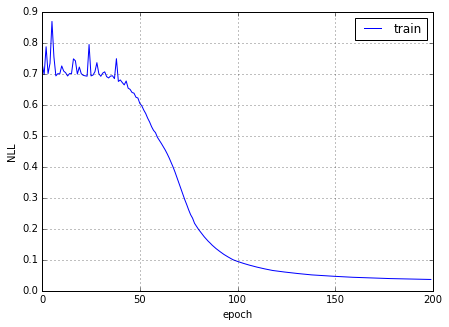

In [14]:
plt.figure(figsize=(7, 5))
plt.plot(nn_bp.error_train, label='train')
if nn_bp.error_test:
    plt.plot(nn_bp.error_test, label='CV')
plt.xlabel('epoch')
plt.ylabel(nn_bp.loss_function)
plt.legend()
plt.grid()

In [15]:
print 'Weights in RBM:\n', nn_rbm.weights
print 'Weights in BP:\n',  nn_bp.weights[0][:-1,:]

Weights in RBM:
[[ 0.32291736  0.0500266  -0.3552537   0.04940282]
 [ 0.07173695  0.12553225 -0.11915258 -0.08378907]]
Weights in BP:
[[ 4.23408712 -4.98244919 -1.96816424 -4.37496271]
 [-5.92751912  2.54378967  0.01945243 -4.76424865]]


In [16]:
Y_predicted = nn_bp.predict(X_test, batch_size=5)

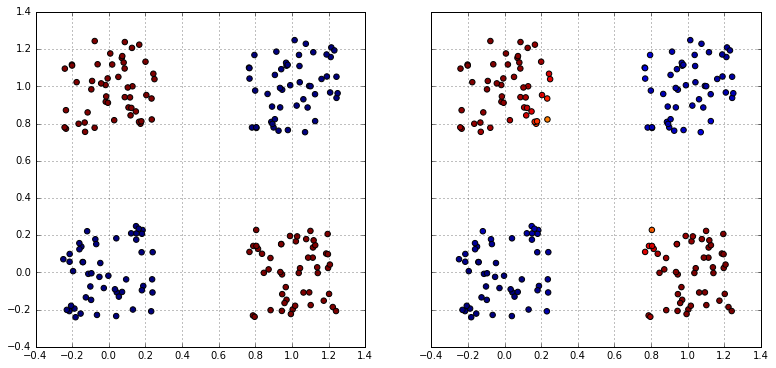

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 6))
ax1.scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted[:,1] > 0.5, s=30)
ax1.grid()
ax2.scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted[:,1], s=30)
ax2.grid()